In [45]:
import nltk
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df['total']=df['title']+' '+df['author']+df['text']
df=df.fillna(' ')

In [42]:
from wordcloud import WordCloud, STOPWORDS
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df[df['label']==0].total:
    
    # split the value 
    tokens=val.split()
    
      # Converts each token into lowercase 
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        
    real_words +=" ".join(tokens)+ " "
    
for val in df[df['label']==1].total:
    
    # split the value
    tokens=val.split()
    
      # Converts each token into lowercase 
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        
    fake_words +=" ".join(tokens)+" "

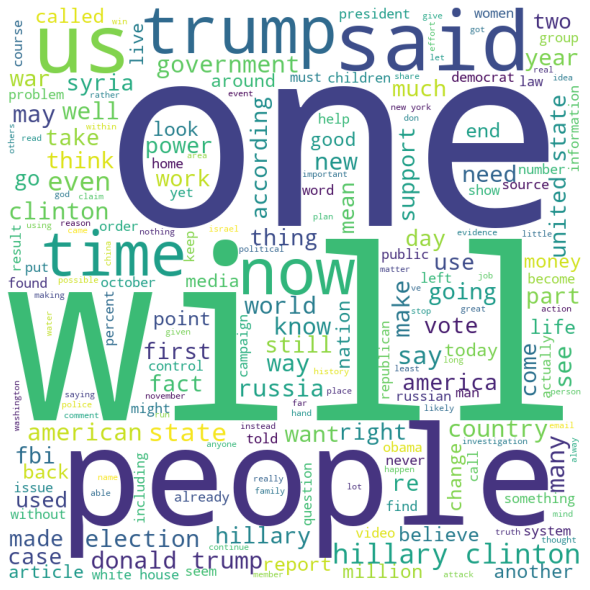

In [43]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

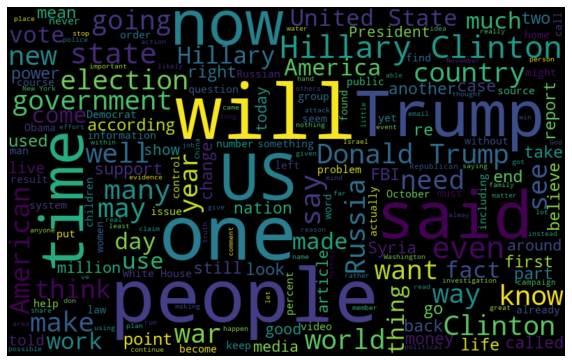

In [41]:
#fake words
fake_words=' '.join([text for text in df['total'][df['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(fake_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

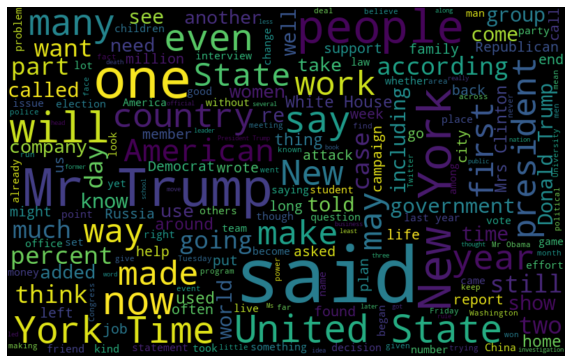

In [44]:
#real words
real_words=' '.join([text for text in df['total'][df['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(real_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
#getting the independent features
x=df.drop('label',axis=1)

In [8]:
x.head()

,id,title,author,text,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Iranian woman jailed for fictional unpublished...


In [9]:
#get the dependent feature
y=df['label']

In [10]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
df.shape

(20800, 6)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer , HashingVectorizer

In [13]:
df=df.dropna()

In [14]:
messages=df.copy()

In [15]:
messages.head(10)

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


In [16]:
messages.reset_index(inplace=True)

In [17]:
messages.head(10)

,index,id,title,author,text,label,total
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,
7,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Benoît Hamon Wins French Socialist Party’s Pre...
8,8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,
9,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


In [18]:
messages.title[6]

'Life: Life Of Luxury: Elton John’s 6 Favorite Shark Pictures To Stare At During Long, Transcontinental Flights'

In [19]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review =re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [20]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [21]:
#Applying CountVectorizer
#Creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [22]:
X.shape

(20800, 5000)

In [23]:
y=messages['label']

In [24]:
#Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=0)

In [25]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

In [26]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [27]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())

In [28]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
l_pred=lr.predict(X_test)
l_score=accuracy_score(y_test,pred)
print("Accuracy Score: %0.3f" % l_score)

C:\Users\Jainendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score: 0.875


In [29]:
#MultinomialNB Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import itertools

In [31]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=accuracy_score(y_test,pred)
print("Accuracy Score: %0.3f" % score)
confusion_matrix(y_test,pred)

Accuracy Score: 0.875


array([[3017,  373],
       [ 482, 2992]], dtype=int64)

In [32]:
y_train.shape

(13936,)

In [33]:
#Multinomial Classifier with Hyperparameter
classifier=MultinomialNB(alpha=0.1)

In [34]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Jainendra\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8613053613053613
Alpha: 0.1, Score : 0.8742715617715617
Alpha: 0.2, Score : 0.875
Alpha: 0.30000000000000004, Score : 0.8752913752913752
Alpha: 0.4, Score : 0.8758741258741258
Alpha: 0.5, Score : 0.8755827505827506
Alpha: 0.6000000000000001, Score : 0.8751456876456877
Alpha: 0.7000000000000001, Score : 0.8748543123543123
Alpha: 0.8, Score : 0.8751456876456877
Alpha: 0.9, Score : 0.8752913752913752


In [35]:
#Get Features names
feature_names=cv.get_feature_names()

In [36]:
classifier.coef_[0]

array([-8.70157255, -9.11267148, -9.82291309, ..., -9.82291309,
       -8.82076107, -9.29838863])

In [37]:
#Most real words
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:20]

[(-4.024970526235633, 'trump'),
 (-4.33525860779907, 'hillari'),
 (-4.404669396738119, 'clinton'),
 (-4.883983708267234, 'elect'),
 (-5.218087795377739, 'us'),
 (-5.242530352997828, 'new'),
 (-5.312053587796071, 'video'),
 (-5.358591647946785, 'war'),
 (-5.41998572014061, 'hillari clinton'),
 (-5.441317587043864, 'news'),
 (-5.449979399536214, 'russia'),
 (-5.463114439519553, 'fbi'),
 (-5.4990088267765325, 'comment'),
 (-5.5221152152169894, 'email'),
 (-5.555388246553852, 'america'),
 (-5.625451911393666, 'obama'),
 (-5.667808692912271, 'vote'),
 (-5.700796840790676, 'world'),
 (-5.764255267221854, 'donald'),
 (-5.7883673455555655, 'american')]

In [38]:
#Most fake words
sorted(zip(classifier.coef_[0],feature_names))[:30]

[(-10.992984346963176, 'abroad'),
 (-10.992984346963176, 'abus new'),
 (-10.992984346963176, 'abus new york'),
 (-10.992984346963176, 'act new'),
 (-10.992984346963176, 'act new york'),
 (-10.992984346963176, 'advic'),
 (-10.992984346963176, 'advis new'),
 (-10.992984346963176, 'advis new york'),
 (-10.992984346963176, 'age new'),
 (-10.992984346963176, 'age new york'),
 (-10.992984346963176, 'agenda breitbart'),
 (-10.992984346963176, 'aleppo new'),
 (-10.992984346963176, 'aleppo new york'),
 (-10.992984346963176, 'alex jone'),
 (-10.992984346963176, 'ali'),
 (-10.992984346963176, 'alter'),
 (-10.992984346963176, 'america breitbart'),
 (-10.992984346963176, 'america new'),
 (-10.992984346963176, 'america new york'),
 (-10.992984346963176, 'ami schumer'),
 (-10.992984346963176, 'amp'),
 (-10.992984346963176, 'annual'),
 (-10.992984346963176, 'anti abort'),
 (-10.992984346963176, 'applaud'),
 (-10.992984346963176, 'applic'),
 (-10.992984346963176, 'approach'),
 (-10.992984346963176, 'ar